# Final Exam
# Machine Learning 2015-2

After solving all the questions in the exam save your notebook with the name `username.ipynb` and submit it to: https://www.dropbox.com/request/KN8GwdAIi0Hl2jk2mg2E

---

The following code implements a simple one-neuron neural network:

In [2]:
import numpy as np
import pylab as pl
%matplotlib inline

def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

def predict(w, x):
    x = np.append(np.array([1]), x)
    return sigmoid(np.dot(w, x))

### 1. (1.0)
Find a weight vector such that the neural network calculates the NOR function:
    
$$f(x,y)=\neg(x\vee y)$$

Use the following function to test your answer:

In [25]:
def test_prediction(X, Y, w):
    epsilon = 0.001
    for i, x in enumerate(X):
        if np.abs(predict(w, x) - Y[i]) > epsilon:
            raise Exception("Prediction error")
    return True

X = [[0, 0],
 [0, 1],
 [1, 0],
 [1, 1]]
Y = [1, 0, 0 ,0]
w = np.array([0, 0, 0])
test_prediction(X, Y, w)

Exception: Prediction error

### 2. (1.0)

The following function calculates the loss function of the neural network

In [26]:
def loss(w, x, y):
    return (predict(w, x) - y) ** 2 / 2

Write a function that calculates the gradient of the loss with respect to the weights:

$$ \frac{\partial E}{\partial w} $$

In [28]:
def de_dw(w, x, y):
    delta = np.zeros(len(w))
    # put your code here
    return delta

Use the following functions to test your code:

In [29]:
def num_de_dw(w, x, y, epsilon):
    deltas = np.identity(len(w)) * epsilon
    de = np.zeros(len(w))
    for i in range(len(w)):
        de[i] = (loss(w + deltas[i, :], x, y) - loss(w - deltas[i, :], x, y)) / (2 * epsilon)
    return de

def test_de_dw():
    num_tests = 100
    epsilon = 0.0001
    for i in range(num_tests):
        tw = np.random.randn(3)
        tx = np.random.randn(2)
        ty = np.random.randn(1)
        if np.linalg.norm(de_dw(tw, tx,ty) - num_de_dw(tw, tx, ty, epsilon)) > epsilon:
            raise Exception("de_dw test failed!")

test_de_dw()

Exception: de_dw test failed!

Now, we can use the gradient function to train the neural network using gradient descent

In [30]:
def evaluate(w, X, Y):
    result = 0
    for i, x in enumerate(X):
        result += loss(w, x, Y[i])
    return result

def train(X, Y, epochs, eta, w_ini):
    losses = []
    w = w_ini
    for i in range(epochs):
        delta = np.zeros(len(w))
        for i, x in enumerate(X):
            delta += de_dw(w, x, Y[i])
        w = w - eta * delta
        losses.append(evaluate(w, X, Y))
    return w, losses

[ 0.  0.  0.]
0.5
0.5


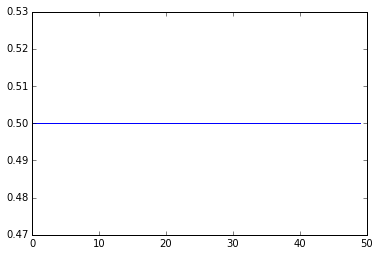

In [31]:
X = [[0, 0],
     [0, 1],
     [1, 0],
     [1, 1]]
Y = [0, 0, 1, 0]
w, losses = train(X, Y, 50, 10, [0, 0, 0])
pl.plot(losses)
print w
print predict(w, [1, 0])
print predict(w, [0, 1])

### 3. (1.0)

Now we will modify the loss function to include a regularization term:
$$ E(w,D)=\frac{1}{2}\sum_{(x_{i},y_{i})\in D}(f(w,x_{i})-y_{i})^{2}+\frac{\text{1}}{2}\beta\left\Vert w\right\Vert _{2}^{2}$$

where $f(w,x_{i})$ is the prediction calculated by the neural network.

To accomplish this you must modify the following functions:

In [32]:
def reg_loss(w, beta, x, y):
    loss = 0
    # your code here
    return loss

def reg_de_dw(w, beta, x, y):
    delta = np.zeros(len(w))
    # put your code here
    return delta

You can use the following functions to test your code:

In [33]:
def reg_num_de_dw(w, beta, x, y, epsilon):
    deltas = np.identity(len(w)) * epsilon
    de = np.zeros(len(w))
    for i in range(len(w)):
        de[i] = (reg_loss(w + deltas[i, :], beta, x, y) - reg_loss(w - deltas[i, :], beta, x, y)) / (2 * epsilon)
    return de

def reg_test_de_dw():
    num_tests = 100
    epsilon = 0.0001
    beta = 1
    for i in range(num_tests):
        tw = np.random.randn(3)
        tx = np.random.randn(2)
        ty = np.random.randn(1)
        if np.linalg.norm(reg_de_dw(tw, beta, tx, ty) - reg_num_de_dw(tw, beta, tx, ty, epsilon)) > epsilon:
            raise Exception("reg_de_dw test failed!")

reg_test_de_dw()

### 4. (1.0)
Now train the neural network using regularization:

In [34]:
def reg_evaluate(w, beta, X, Y):
    result = 0
    # your code here
    return result

def reg_train(X, Y, epochs, eta, w_ini, beta):
    losses = []
    w = np.array(w_ini)
    # your code here
    return w, losses

[0 0 0]
0.5
0.5


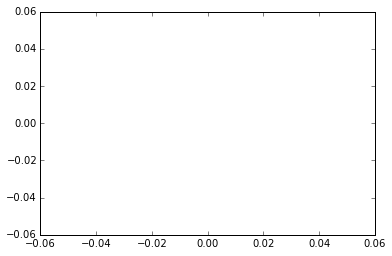

In [35]:
X = [[0, 0],
     [0, 1],
     [1, 0],
     [1, 1]]
Y = [0, 0, 1, 0]
wr, losses = reg_train(X, Y, 50, 2, [0, 0, 0], 0.01)
pl.plot(losses)
print wr
print predict(wr, [1, 0])
print predict(wr, [0, 1])

What is the effect of regularization? Discuss.

### 5. (1.0)
Here, we will build a kernel version of the previous neural network, i.e., a neural network able to work in a 
feature space induced by a kernel. To do this we will express the weight vector as a linear combination of vectors in a set $X$:

$$ w=\sum_{x_{i}\in X}\alpha_{i}\phi(x_{i}) $$

Now, implement this modifying the following functions:

In [36]:
def k_predict(alpha, X, kernel, x):
    result = 0
    # your code here
    return sigmoid(result)
    
def k_loss(alpha, X, beta, kernel, x, y):
    loss = 0
    # your code here
    return loss

Test your functions with the following code:

In [37]:
alpha = [1, 0.5, -0.3, -0.4]
Xs = [[0.1, -0.5],
     [0.5, 1.0],
     [-1.0, 0.5],
     [1.0, 1.0]]

def k1(x, y):
    return np.dot(x, y)

def k2(x, y):
    return (np.dot(x, y) + 1) ** 2

X = [[0, 0],
     [0, 1],
     [1, 0],
     [1, 1]]
Y = [0, 0, 1, 0]
for i, x in enumerate(X):
    print k_predict(alpha, Xs, k1, x), k_loss(alpha, Xs, 1, k1, x, Y[i])
print "--------"
for i, x in enumerate(X):
    print k_predict(alpha, Xs, k2, x), k_loss(alpha, Xs, 1, k2, x, Y[i])

0.5 0
0.5 0
0.5 0
0.5 0
--------
0.5 0
0.5 0
0.5 0
0.5 0


### 6. (optional, extra credit)

Train the kernel neural network using gradient descent.